# Biodiversity in National Parks

In [243]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

This goal of this project is to analyse biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are the questions that this project will seek to answer:

1. What is the distribution of conservation status for species?
2. What are the rarest species observed in the parks?
3. What is the spread of endangered and in recovery birds at the national parks?
4. Does a species having 'Common' in their name have a relationship with whether the species is protected or not


This report will first explain the data available, format and clean the data, then explore each dataset individually and finally analyse using statistical methodology, the relationship between protection and the 'Common'ness of the species 

In [244]:
observations_df = pd.read_csv('observations.csv', encoding='utf-8')
species_df = pd.read_csv('species_info.csv', encoding='utf-8')

## The Data(sets)


To begin the data supplied is in two separate datasets. 

Both are relatively large, the first with 23,296 rows and 3 columns, the second with 5,824 rows and 4 columns.

In [245]:
print(species_df.shape)
print(observations_df.shape)


(5824, 4)
(23296, 3)



The first dataset is focussed on the observations of different species in different National Parks in the USA.

The 3 variables here are: 

1. 'scientific_name' - the name of the species observed in the binomial naming format
2. 'park_name' - the National Park where the species has been observed
3. 'observations' - the number of the species observed

Note that a timeframe for these observations was not given, but for the purpose of the exersise the report will assume that the data has been collected in fair and scientific manner, so other than removing duplicates and other abnormalities in the data it should not need to be treated further.

In [246]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [247]:
print('The observations data has ' + str(observations_df['scientific_name'].nunique()) + ' scientific names of species.')
print('These observations come from ' + str(observations_df['park_name'].nunique()) + ' different National Parks: ')
print(observations_df['park_name'].unique())


The observations data has 5541 scientific names of species.
These observations come from 4 different National Parks: 
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


The second dataset provides further information on the species observed in the observations data.

Here there are 4 variables:

1. 'category' - the type of flora or fauna (eg mammal, bird etc)
2. 'scientific_name' - same as earlier, the name of a species in the binomial naming format
3. 'common_names' - the non-binomial names of the species, the names used in common speech (eg Bos bison is commonly known as the American Bison)
4. 'conservation_status' - the convservation status of each species

The common field in these two datasets is the scientific name variable. So after describing and cleaning both datasets this report will use this field to merge the data to help analyse the conservation status of the species in each National Park.

For the purporse of looking into the differences in observations of species and between the parks, this report will focus mainly on this dataset.

In [248]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [249]:
print('There are ' + str(species_df['category'].nunique()) + ' unique categories of species in this dataset: ')
print(species_df['category'].unique())
print('There are '+ str(species_df['scientific_name'].nunique()) + ' unique scientific names with ' + str(species_df['common_names'].nunique()) + ' unique common names') 

print('The dataset also has ' + str(species_df['conservation_status'].nunique()) + ' conservation status labels:') 
print(species_df['conservation_status'].unique())


There are 7 unique categories of species in this dataset: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
There are 5541 unique scientific names with 5504 unique common names
The dataset also has 4 conservation status labels:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


## Descriptive Statistics and Data Wrangling

Before exploring and analysing the observations dataset this report imports a very useful function for wrapping the labels taken from [here](https://www.dunderdata.com/blog/Automatically%20Wrap%20Graph%20Labels%20in%20Matplotlib%20and%20Seaborn).

This function will be called to make later graphs more legible when using longer names of variables and categories.


In [250]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

Below the initial descriptive statistics for the observations of each species in the observations dataset are shown.

A mean of 142 species are observed in the given datapoints and a median of 124 are calculated and afterwards a histogram showing the distribution of the observations data is plotted. 

The data shows a general right skewness with a second smaller peak around 250 observations. Due to this both the mean and the median fall outside of the larger peak. 

As this is not time series data the observations will not be used too in depth when it comes to calculations or in depth statistics. As such, this skewness should not affect this report too heavily. It is interesting that there is a bias against the reporting of observations around 200 though. 

In [251]:
observations_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


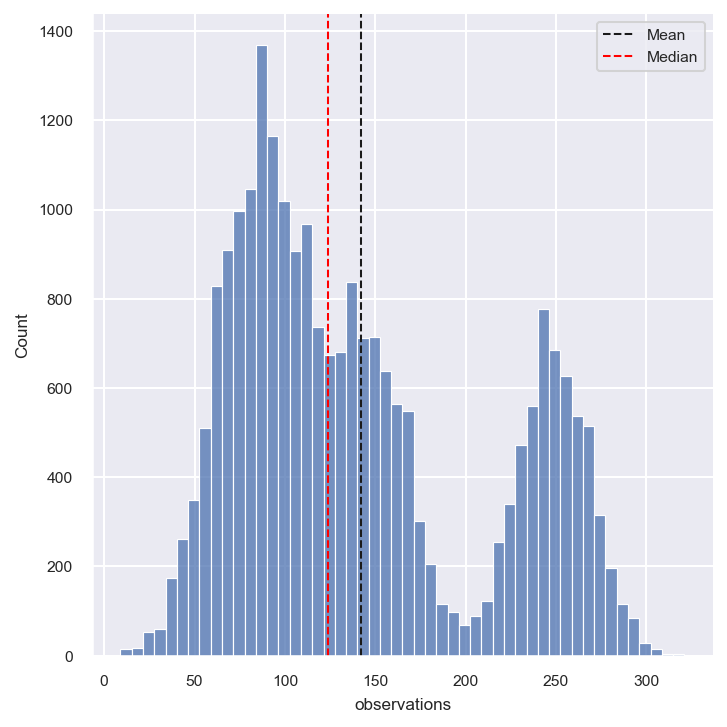

In [252]:
sns.set_theme(style='darkgrid', 
              rc={'figure.dpi': 147},              
              font_scale=0.7)

sns.displot(observations_df.observations, 
            bins=50, 
            kde=False)

plt.axvline(observations_df.observations.mean(), 
            color='k', 
            linestyle='dashed', 
            linewidth=1, 
            label = "Mean")

plt.axvline(observations_df.observations.median(), 
            color='red', 
            linestyle='dashed', 
            linewidth=1, 
            label = "Median")

plt.legend()
plt.show()

Here the descriptive statistics for the species dataset are presented.

As there is a slight difference in the total number of unique scientific and common names this suggests there may be some duplicates in the data, upon further inspection this is confirmed.

These duplicates are then removed from the dataset to avoid complications and inprecise analysis later on. 

Also a large amount of data referring to the conservation status of the species is left empty. 

As there is not much information on the dataset provided by Codecademy, this report will assume those that are blanks do not have a conservation status are considered not in need of protection. Therefore the report amends those from Nan to 'Not Protected'. 

In [253]:
species_df.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [254]:
duplicateRows = species_df[species_df.duplicated(['common_names'])]
duplicateRows.count()

category               320
scientific_name        320
common_names           320
conservation_status      5
dtype: int64

In [255]:
observations_df = observations_df.drop_duplicates()
species_df = species_df.drop_duplicates()
species_df = species_df.drop_duplicates(subset =['scientific_name', 'common_names'], keep = 'first')
species_df['conservation_status'] = species_df['conservation_status'].fillna("Not Protected")
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Protected
1,Mammal,Bos bison,"American Bison, Bison",Not Protected
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Protected
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Protected
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Protected


Finally the observations and species data are combined into one dataset with an outer merge on the scientific names variable. This will allow for the sorting and analysis of the observations data by both the common names and the conservation status.  

In [256]:
combined_df = pd.merge(observations_df, species_df, how = 'outer', on = 'scientific_name' )
combined_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Protected
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Protected
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Protected
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Protected
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Protected


## Exploration and Analysis of the Species Dataset

Now that the data is formatted correctly this report can start to explore and analyse the datasets

In this section this report begins with the Species dataset.



### Distribution of Conservation Status

Below shows the distribution of the conservation status of the species available in the data. 

Over 96% of the species listed are considered not in need of protection, the vast majority of species in the national parks are therefore not protected in anyway. 

This may increase due to the foreseen changes in climate that is predicted to affect much of the national parks in the data

In [257]:
group = species_df.groupby('conservation_status').count()
group = group.drop(['common_names','category'], axis = 1)
group = group.rename(columns={'scientific_name':'count'}).reset_index()
group

,conservation_status,count
0,Endangered,15
1,In Recovery,4
2,Not Protected,5633
3,Species of Concern,161
4,Threatened,9


The below pie chart removes the 'Not Protected' variables as they make up such a large proportion that visualisations would be skewed and unreadable with the category included.

The majority of protected species are designated a 'species of concern', the lowest ranking on the scale. These species are those identified as in need of intervention but do not yet meet the criteria to be classified further under the Endangered Species Act 1973 (US)

According to the legislation:

>"The term “threatened species” means any species which is likely to become an
endangered species within the foreseeable future throughout all or a significant portion of its range"

>"The term “endangered species” means any species which is in danger of extinction throughout all or a significant portion of its range" 

[Source](https://www.fws.gov/sites/default/files/documents/endangered-species-act-accessible.pdf)

'In Recovery' species are those that were once classified under the Endangered Species Act 1973 but have shown significant enough increases in their numbers that they no longer need the safeguards of the legislation

Interestingly more species are considered endangered rather than threatened. 

An interesting further study would be to look at the changes in classifications of species over time. From this it could be visible whether classifications have been affected by climate change, human intervention or even political parties.

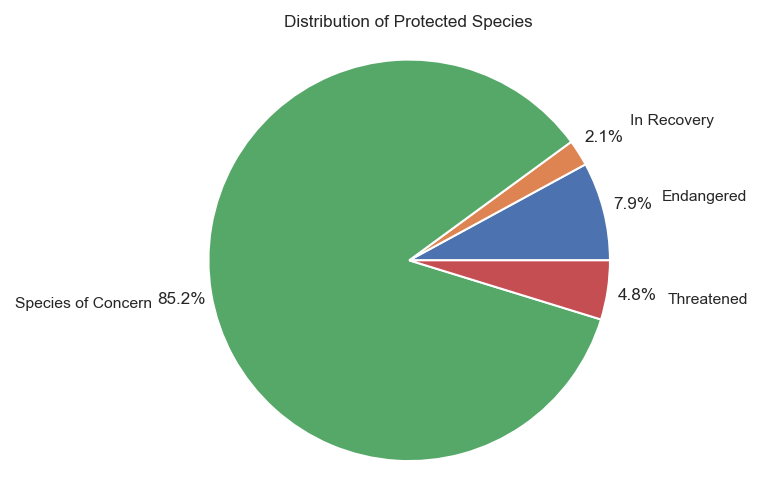

In [258]:
group = group.loc[group['conservation_status'] != 'Not Protected']
group = group.copy()

group['prop'] = (group['count'] / group['count'].sum()) * 100


wedge_sizes = group["prop"]
pie_labels = group["conservation_status"]

plt.pie(wedge_sizes, labels = pie_labels, autopct='%1.1f%%', pctdistance=1.15, labeldistance=1.3)

plt.axis('equal')
plt.title('Distribution of Protected Species')
plt.show()

### Protected Species by Category

Below this report presents a table and visualisation of the distribution of protected species by the category of flora or fauna. Again in the visualisation the Not Protected category has been removed to allow for easier interpretation of the data.

Birds have the highest number of protected species overall, therefore this project will further analyse these when looking further into the park data.

In [259]:
group_pivot = species_df.groupby(['conservation_status', 'category']).count().reset_index('category')
group_pivot = group_pivot.drop('common_names', axis = 1)
group_pivot = group_pivot.pivot(columns='category', values='scientific_name')
group_pivot = group_pivot.fillna(0)
group_pivot

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,1.0,0.0,0.0,0.0
Not Protected,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


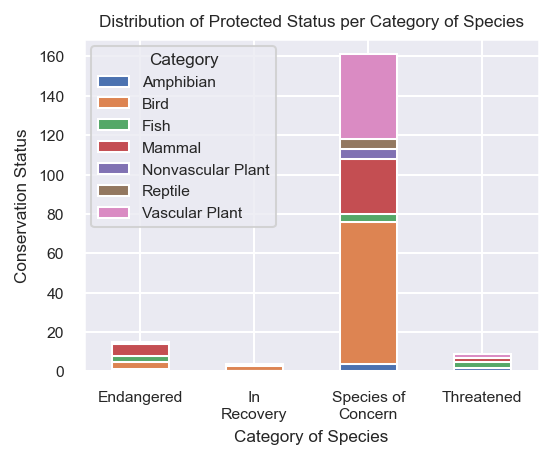

In [260]:
fig, ax = plt.subplots(figsize=(4, 3))
group_pivot.drop('Not Protected').plot(ax = ax, 
                                       kind='bar', 
                                       stacked=True)

plt.title('Distribution of Protected Status per Category of Species')
plt.xlabel('Category of Species')
plt.ylabel('Conservation Status')
plt.legend(title = 'Category')
wrap_labels(ax, 10)
plt.show()

## Exploration and Analysis of the Observations Dataset

Following from the exploration of the species the report will now focus on the observation data. 

Here, the report will explore and analyse both in terms of species that are protected, and their respective categories, as well as the differences that can be seen in observations between the four national parks found in the data.

### Observed Protected Species by Category

As shown in the data below, the vast majority of species observed in the national parks have a conservation status of 'Not Protected'. This is generally in line with the fact that the vast majority of species are considered not protected.

Removing these from consideration shows that Birds, Mammals and Vascular plants make up the most observed protected species in the parks; with just over half of these observations being of the 'Species of Concern' status.

In [261]:
obs_name = combined_df.groupby(['category','conservation_status'], as_index = False ).sum('observations').sort_values('observations', ascending = False).set_index('category')
obs_name = obs_name.pivot(columns='conservation_status', values='observations').fillna(0)
obs_name

conservation_status,Endangered,In Recovery,Not Protected,Species of Concern,Threatened
category,,,,,
Amphibian,144.0,0.0,42316.0,2044.0,564.0
Bird,574.0,1392.0,288882.0,40758.0,0.0
Fish,455.0,0.0,68692.0,2109.0,832.0
Mammal,1463.0,715.0,137462.0,21675.0,578.0
Nonvascular Plant,0.0,0.0,187948.0,2705.0,0.0
Reptile,0.0,0.0,43286.0,2536.0,0.0
Vascular Plant,162.0,0.0,2768865.0,22135.0,552.0


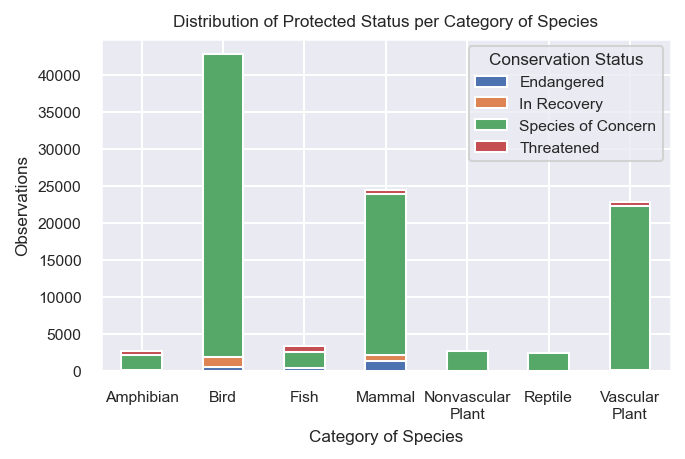

In [262]:
fig, ax = plt.subplots(figsize=(5, 3))

obs_name.drop('Not Protected', axis = 1).plot(ax = ax,
                                              kind='bar', 
                                              stacked=True)

plt.title('Distribution of Protected Status per Category of Species')
plt.xlabel('Category of Species')
plt.ylabel('Observations')
plt.legend(title = 'Conservation Status')
wrap_labels(ax, 10)
plt.show()

Looking further into the Endangered category shows that 52.3% of endangered species observed are mammals. 

This goes a little against expectations as according to the species data only 6 of the 15, around 40%,  endangered species are mammals.

In the next section the report will look into this further.

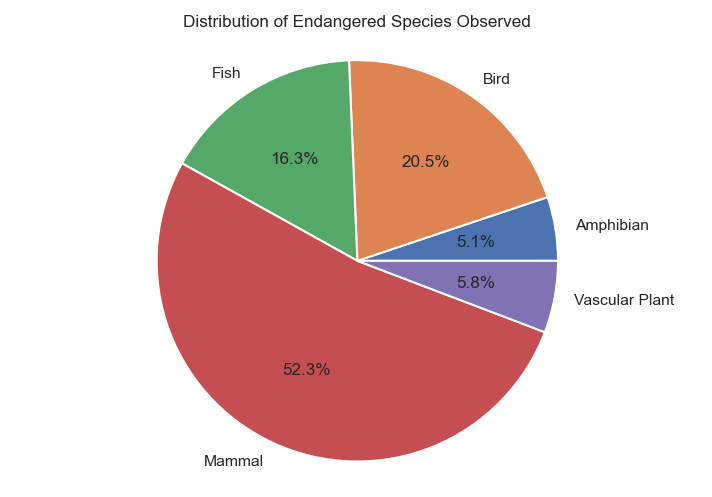

In [263]:
endangered =  obs_name['Endangered'].reset_index()
endangered = endangered[endangered['Endangered'] !=0]

endangered['prop'] = (endangered['Endangered'] / endangered['Endangered'].sum()) * 100


wedge_sizes = endangered["prop"]
pie_labels = endangered["category"]

plt.pie(wedge_sizes, labels = pie_labels, autopct='%1.1f%%')
#pctdistance=1.15, labeldistance=1.3
plt.axis('equal')
plt.title('Distribution of Endangered Species Observed')
plt.show()

### The Least Observed Species in the Parks

Here the report restricts the data to looking at only those observed species that are endangered, threatened or in recovery.
The least observed species come from a relatively diverse group of categories and are all classified as endangered.

The below table therefore answers question 2 asked in the introduction concerning the rarest species observed in the park

In [264]:
species_obs = combined_df[combined_df['conservation_status'] != 'Not Protected']
species_obs = species_obs.groupby(['common_names', 'conservation_status', 'category']).sum().sort_values('observations').reset_index()
species_obs = species_obs[species_obs['conservation_status'] != 'Species of Concern']
species_obs.head()

,common_names,conservation_status,category,observations
0,Whooping Crane,Endangered,Bird,131
1,Red Wolf,Endangered,Mammal,137
2,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,Bird,141
3,Smoky Madtom,Endangered,Fish,143
4,Sierra Nevada Yellow-Legged Frog,Endangered,Amphibian,144


The Gray Wolf is the most observed of all species not protected or considered a species of concern, which is interesting as there are more observations than those species in recovery or threatened (both of which are considered less serious classifications). 

This would explain why the proportion of endangered species skewed slightly towards mammals in the prior section and could suggest that the Gray Wolf is less in decline in the national parks than in other parts of the US. This would mean that the endangered tag may not necessarily make sense with certain regions. 

However the endangered tag could also be linked to a rate of decline. Looking at Gray Wolf observations over time may therefore be an interesting further study to see if this this is the case. 

Furthermore, this could also be due to a bias in the reporting. Wolves are pack animals so when observed are largely observed in groups. Comparing this to the species in recovery, which tend to be solitary birds may be unfair in this sense. However, of note is that the Red Wolf, which is also a pack animal and considered endangered, is the second lowest observed protected species. These two species could serve as interesting case studies in further research, as they are both closely related, both endangered but seem to have varying numbers of observations in the parks.

In [265]:
species_obs.tail()

,common_names,conservation_status,category,observations
32,Brown Pelican,In Recovery,Bird,457
41,Bald Eagle,In Recovery,Bird,465
45,American Peregrine Falcon,In Recovery,Bird,470
168,Gray Wolf,Endangered,Mammal,715
169,"Gray Wolf, Wolf",In Recovery,Mammal,715


### Distribution of Observations Across the Parks

Here, this report pivots to looking at the national parks individually. 

Below is the distribution of observations per park. 

Yellowstone has the most observations, followed by Yosemite, Bryce National Park and the Great Smoky Mountains National Park. The latter two seem to be the closest of all the parks with regards to their numbers of observations. 

In [266]:
obs_park = combined_df.groupby('park_name').sum('observations')
obs_park

,observations
park_name,
Bryce National Park,632749
Great Smoky Mountains National Park,473820
Yellowstone National Park,1584188
Yosemite National Park,948087


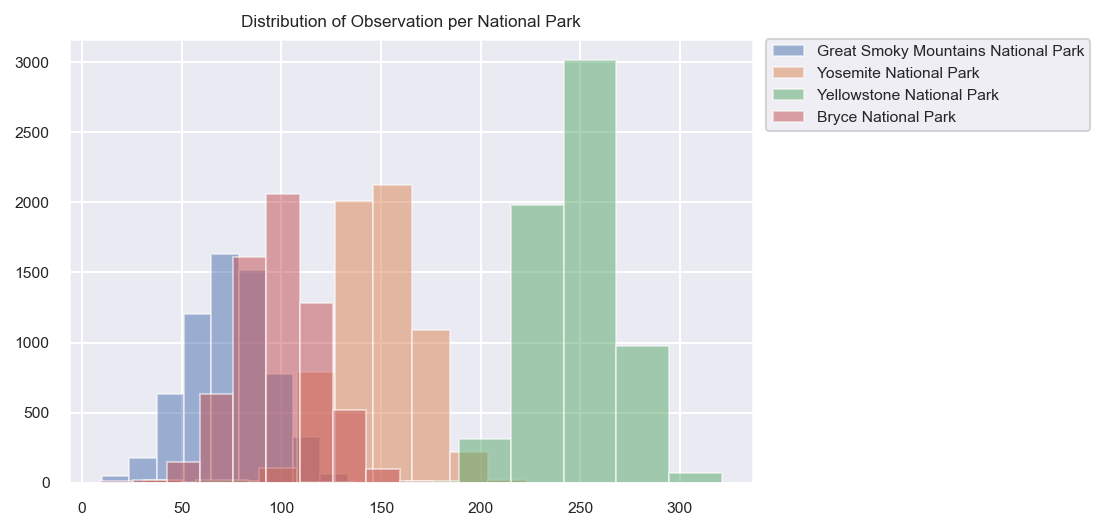

In [267]:
for park in (combined_df['park_name'].unique()):
    plt.hist(combined_df.observations[combined_df.park_name == park], 
             label= park, 
             alpha=.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Distribution of Observation per National Park')

plt.show()

As is to be expected by the distribution of observations in the park, the observations of protected species follows the same pattern, with Yellowstone being first, followed by Yosemite and then Bryce and Great Smoky Mountains respectively.

In [268]:
obs_park = combined_df.groupby(['park_name','conservation_status'], as_index = False ).sum('observations').sort_values('observations', ascending = False).set_index('park_name')
obs_park = obs_park.pivot(columns='conservation_status', values='observations').fillna(0)
obs_park

conservation_status,Endangered,In Recovery,Not Protected,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,489,388,614434,17011,427
Great Smoky Mountains National Park,334,248,461163,11735,340
Yellowstone National Park,1228,889,1540307,40677,1087
Yosemite National Park,747,582,921547,24539,672


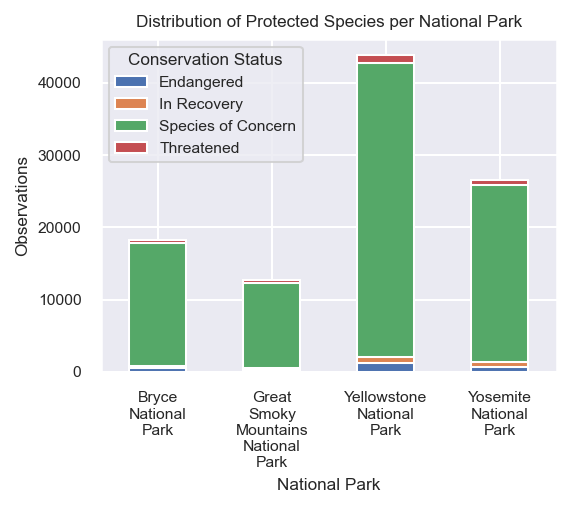

In [269]:
obs_park = combined_df.groupby(['park_name','conservation_status'], as_index = False ).sum('observations').sort_values('observations', ascending = False).set_index('park_name')
obs_park = obs_park.pivot(columns='conservation_status', values='observations').fillna(0)
obs_park = obs_park.drop('Not Protected', axis = 1)

fig, ax = plt.subplots(figsize=(4, 3))

obs_park.plot(ax = ax, kind='bar',stacked=True)

ax.set_title('Distribution of Protected Species per National Park')
ax.set_xlabel('National Park')
ax.set_ylabel('Observations')
plt.legend(title = 'Conservation Status')

wrap_labels(ax, 10)


### Endangered and In Recovery Bird Species

In the final part of this section, the report will further analyse the spread of protected birds in the parks, as in the earlier sections birds were identified as having the most protected species of all categories of species. 

As expected the bottom 4 are those considered endangered, whereas those that are in recovery have significantly higher observations.

In [270]:
birds_df = combined_df[combined_df['category'] == 'Bird']
birds_obs = birds_df.groupby(['common_names', 'conservation_status']).sum('observations').sort_values('observations', ascending = False).reset_index()

In [271]:
birds_obs.tail()

,common_names,conservation_status,observations
481,Double-Crested Cormorant,Species of Concern,441
482,California Condor,Endangered,156
483,Red-Cockaded Woodpecker,Endangered,146
484,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,141
485,Whooping Crane,Endangered,131


In [272]:
birds_rec = birds_obs[birds_obs['conservation_status'] == 'In Recovery']
birds_rec

,common_names,conservation_status,observations
468,American Peregrine Falcon,In Recovery,470
471,Bald Eagle,In Recovery,465
474,Brown Pelican,In Recovery,457


The graphs below look at the distribution of the observed endangered and in recovery bird species across the parks. 

Both Yosemite and Yellowstone show the most observations, which may suggest that they are more successful in their conservation efforts than the other parks. On the other hand these numbers are generally in line with the earlier distribution of observations of all species all the parks, so could simply be due to other factors, such as the size of the parks or the number of people hired to observe and count the different species for example. 

One important difference to highlight however, is the differences between the number of observations between Bryce National Park and Great Smoky Mountains National Park. The earlier histogram showed that the distribution for all observations on these parks was relatively close, the colours overlap for much of their peaks. The graphs show that in the case of the California Condor, the Whooping Crane and the Brown Pelican, these differences are much higher than expected. Further research into the specific actions taken to protect these species may provide interesting results on the respective successes and failures of the two parks in their conservation efforts.

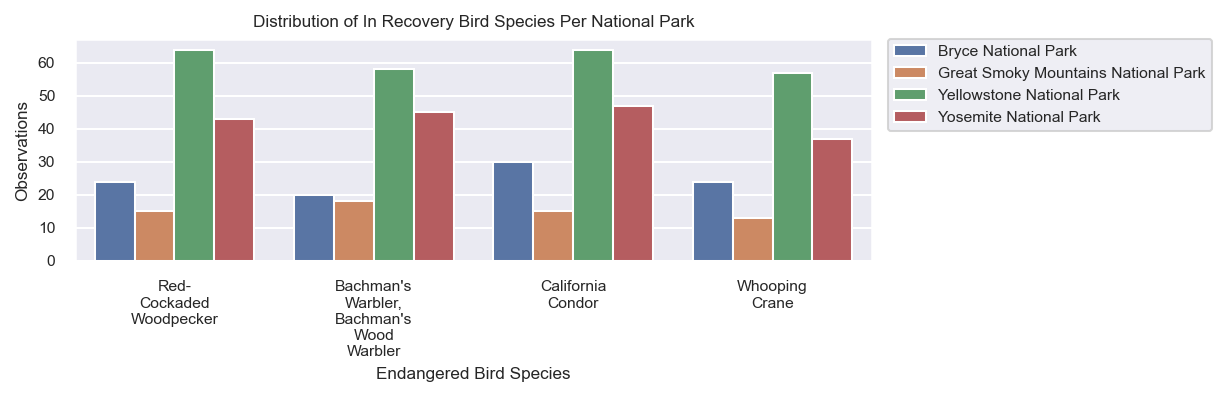

In [273]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)
fig, ax = plt.subplots(figsize=(7, 2))

sns.barplot(
    data=birds_df[(birds_df["conservation_status"] == 'Endangered')].sort_values("park_name"), 
    x="common_names", 
    y="observations", 
    hue="park_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_title('Distribution of In Recovery Bird Species Per National Park')
ax.set_xlabel('Endangered Bird Species')
ax.set_ylabel('Observations')
wrap_labels(ax, 10)

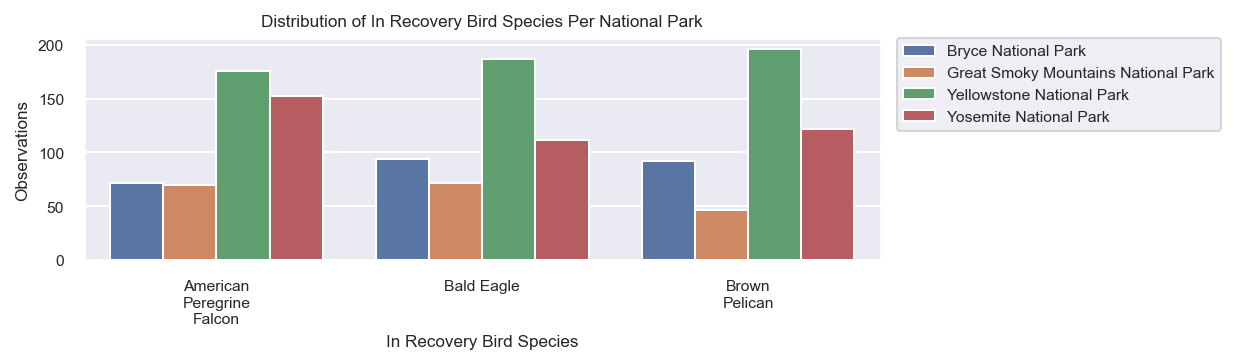

In [274]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)
fig, ax = plt.subplots(figsize=(7, 2))

sns.barplot(
    data=birds_df[(birds_df["conservation_status"] == 'In Recovery')].sort_values("park_name"), 
    x="common_names", 
    y="observations", 
    hue="park_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_title('Distribution of In Recovery Bird Species Per National Park')
ax.set_xlabel('In Recovery Bird Species')
ax.set_ylabel('Observations')

wrap_labels(ax, 10)



## 'Common' Endagered Species

The final section of the report will look at statistically testing whether there is a relationship between 'Common' species and their protection status.

Running some tests on the most common words that show up in the 'Common Names' variable interested me in looking into the word 'Common' and their status of endangerment. If there was some kind of relationship it could suggest a change in species that are now considered common. In most cases the common names have existed for a number of years, so endangerment of a species once considered common would therefore suggest a change in the numbers of those species.

In [275]:
Counter(" ".join(combined_df.common_names).split()).most_common(20)

[('Moss', 1140),
 ('Common', 1090),
 ('Sedge', 916),
 ('Mountain', 720),
 ('Western', 556),
 ('American', 531),
 ('Wild', 522),
 ('Northern', 516),
 ('Sedge,', 512),
 ('Yellow', 508),
 ('White', 496),
 ('Grass,', 426),
 ('California', 380),
 ('Grass', 354),
 ('Hairy', 348),
 ('Blue', 338),
 ('False', 332),
 ('Black', 332),
 ('Sierra', 320),
 ('Slender', 312)]

Below, this report tests the significance of the relationship between whether a species has the term common in it's name and whether it is protected or not.

Both a Chi Squared and Fisher Exact test were carried out, as the p values were greater than 0.05 no statistical signficance was identified.

Nevertheless more studies into this are recommended, particularly using a dataset of 'Common' species and their respective protection status over time to better identify and analyse species that may have once been considered common but are currently considered in need of protection.

In [276]:
species_df['is_common'] =  species_df.common_names.str.contains("Common",regex = True)
species_df['is_protected'] =  species_df.conservation_status != 'Not Protected'

common_species = species_df.groupby(['is_common','is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='is_common',
                                      values='scientific_name')
common_species

is_protected,False,True
is_common,,
False,5230,175
True,164,3


In [277]:
from scipy.stats import chi2_contingency
contingency2 = [[5224,175], [139, 3]]
chi2, pval, dof, expected = chi2_contingency(contingency2)

if pval < 0.05:
    print(f'p_value: {pval}\nResult: There is a significant difference')
else:
    print(f'p_value: {pval}\nResult: No significant difference')

p_value: 0.6087571753027354
Result: No significant difference


In [278]:
from scipy.stats import fisher_exact


contingency2 = [[5224,175], [139, 3]]
odds_ratio, pval = fisher_exact(contingency2)

if pval < 0.05:
    print(f'p_value: {pval}\nResult: There is a significant difference')
else:
    print(f'p_value: {pval}\nResult: No significant difference')

p_value: 0.6297573952508643
Result: No significant difference


## Conclusions

This report finds the below answers to the original questions posed in the introduction:



#### 1. What is the distribution of conservation status for species?

The vast majority of species in the data are not considered protected.
Of those that are protected, the majority are considered a 'species of concern'. 
Of those that are considered endangered most of the observations in the 4 national parks are mammals.


#### 2. What are the rarest species observed in the parks?

The 5 least observed species in the parks are the below, all of which are considered endangered.

|Ranking|Species|
| --- | --- |
|1.|Whooping Crane|
|2.|Red Wolf|
|3.|Bachman's Warbler|
|4.|Smoky Madtom|
|5.|Sierra Nevada Yellow-Legged Frog|	

The Gray wolf has a significant number of observations in the 4 parks, despite being considered endangered.
Further study of the Gray Wolf in the parks, in comparison to the Red Wolf is recommended as further study


#### 3. What is the spread of endangered and in recovery birds at the national parks?

The spread of endangered and in recovery birds across the national parks is largely in line with the overall distribution of observations; with Yellowstone having the most, followed by Yosemite, Bryce and Great Smoky Mountains. The difference between the latter 2 is larger than expected in some instances and is worth further investigation.

#### 4. Does a species having 'Common' in their name have a relationship with whether the species is protected or not?

Having 'Common' in the name does not have a relationship with whether the species is protected or not. 

However studying the conservation status of species considered 'Common' over time may provide interesting results and provide information into the declines of species that were once more numerous.